___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
# !python --version

import platform
print(platform.python_version())

3.8.8


In [2]:
import tensorflow as tf
tf.__version__

'2.9.1'

# Keras Syntax Basics

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [56]:
#from google.colab import drive
#drive.mount('/content/drive')

In [57]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [92]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [93]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


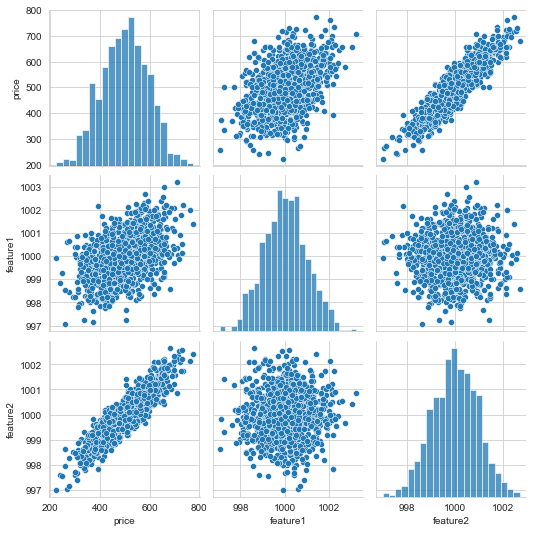

In [96]:
sns.pairplot(df);
# feature 2de yuksek corr goruluyor, 

In [97]:
df.corr()
# Multicorr deep learningte onemli degil

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [100]:
X = df[['feature1', 'feature2']]
y = df['price']

In [101]:
X
# her row bizim gozlemimiz

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [102]:
# pd.DataFrame(y)
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [104]:
X_train.shape
# test size 0.3(%30) olursa trainin %70 olmasini bekleriz

(700, 2)

In [105]:
X_test.shape

(300, 2)

In [106]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler bir class 
# bu datasette outlier olmadigini biliyoruz, yine de minMaxscaler secmek bize kalmis
# 1 ve 0 arasinda cektigi icin negatif datapoint olmaz
# agirliklar rastgele atandiginda, negatif tarafta kalma ihtimali dusuk olur
# negatif agirlik atanirsa bunun onune gecemeyiz 

In [107]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [108]:
scaler = MinMaxScaler()
# Obje olusturduktan sonra kullanabiliyoruz

In [109]:
scaler.fit(X_train)  
# fit metodu parametre ogrenmeyle alakali. Burada Scaleri ogrenmesi gereken metodlari ogretiyor


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # X_test ile ilgili parametre ogrenmiyoruz, gercek data


fit transform islemini ayni anda da yapabilirdik. 
- scale ederken ogrettik ama datasette bir sey degistirmedik 
- o yuzden donusumu transform ile yapiyoruz (X_test ve X_train birlikte transform yapiyoruz)
-  yukarida *help* kisminda detay gorebiliriz, neleri ogrenmesi gerektigi orada yaziyor

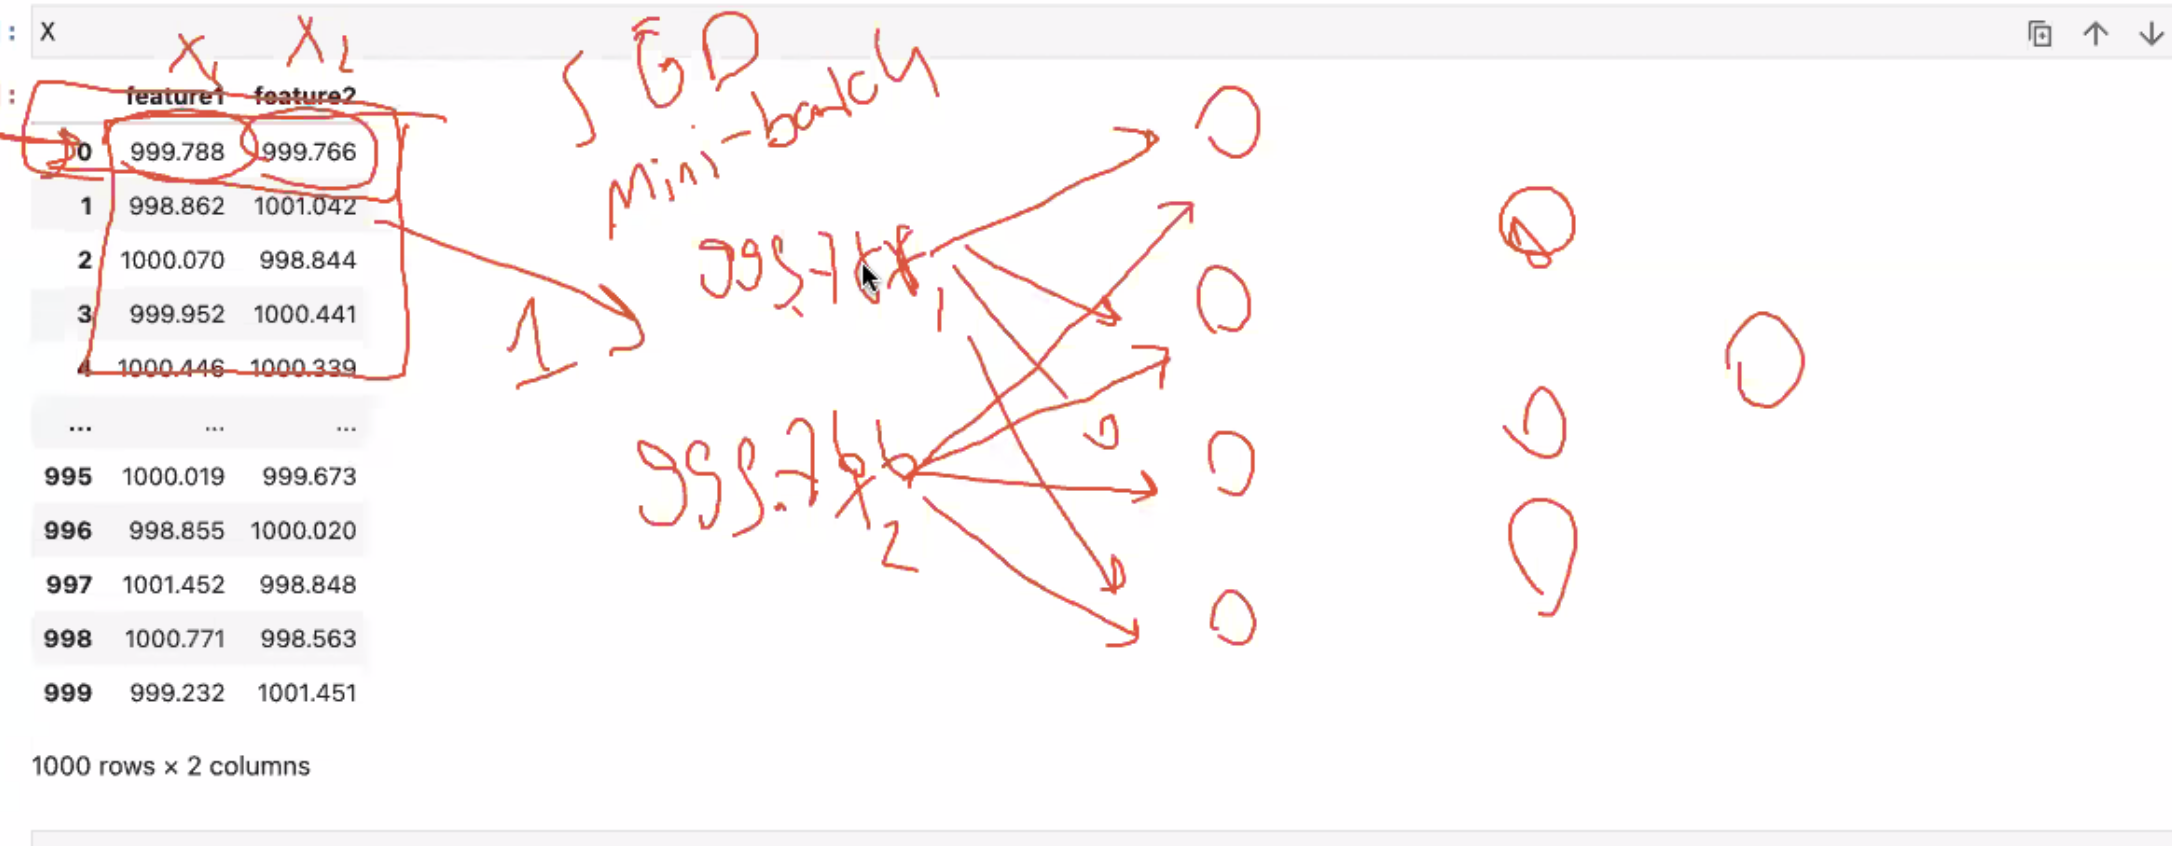

- minibatch sayisi kadar gozleme giriyor 
- ornekte ilk 4 row secili, ilk 4 matris olarak noronlara dagitiliyor (sonrasinda yapilan islem matris carpimi)

## Modelling

In [110]:
import tensorflow as tf

In [111]:
from tensorflow.keras.models import Sequential #keras kod yazmayi kolaylastiriyor
# sequential: model icindeki farkli farkli modeller arka arkaya diziliyor 
from tensorflow.keras.layers import Input, Dense, Activation

In [112]:
help(Sequential)
# sequential ogrendikten sonra functial ogrenmek daha kolay, biz suan ogrenmeyecegiz. 

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [79]:
help(Dense)
# kendisinden once ve sonrasinda tum layerlara bagliysa Dense layer, 
#hidden layer oluyor

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [80]:
X_train.shape

(700, 2)

In [81]:
# First way to create model
# parantez icine liste halinde koyariz 
# degistirmesi zor bir yontem, okunabilirligi kotu
# cok kullanmiyoruz
model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [113]:
# Second way to create model (recommended)

# once secuential 
# bos model olusturduktan sonra ne ogretmek istiyorsak tek tek ekliyoruz 
# okunabilirligi yuksek, tercih edilen bir yontem 

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))# inputlari bu sayede hidden layer almaya baslar 
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

- Dense layer: kendisinden once ve sonrasinda birbirine bagli tum noronlar (CNN ve RNN farkli)
- unit : Bir katmanda kac nöron oldugunu soyler. Genelde 2 ve 2' nin katlari seklinde nöron sayilari verilir.
- Activasyon olarak veriyi kullandik 
- relu: alternatiflerine gore hizli isliyor, %99 relu kullanicaz (RNN'de farkli)  
- input degeri spesicif olarak layer olusturmak gereksiz 
- input layeri elle eklemek yerine ilk add icine **input_dim** eklerseniz, input alma islemini hidden layer yapar. 
- Eger ben egitime baslamadan **input_dim**  vermezsem, model kendisine kac input gelecegini bilmez, input almadan built olamaz, hata verir. 
- (shape[1] diyerek) biz kac sutun varsa onu modele veriyoruz 

In [114]:
model.summary()
# model input sayisini bildigi icin, kac parametre olusturmasi gerektigini anlar

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 12        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


-  parametre sayisinin hesaplanmasi 
- ilk input her bir norona dagitilir, 
- her bir oka parametre verilmesi lazim 
- 2 x 4 = 8 ok var. 8 agirilik vermesi lazim, 
- her noronun biasi var (4) 
- 8 w + 4 b = 12 
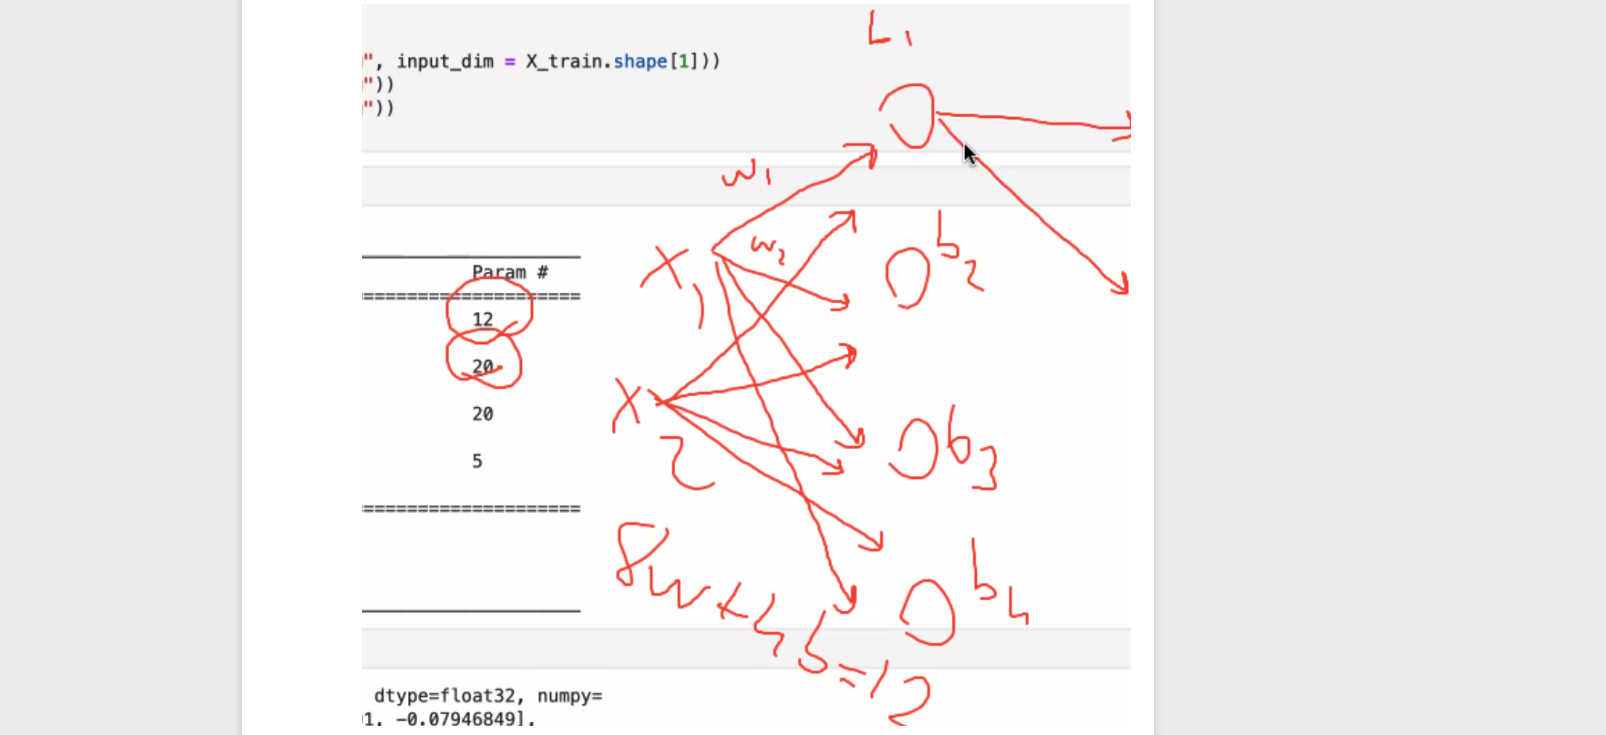

her bir noronundan da biasi var dolayisiyla 4 noran var diyelim 4 bias 4x4=16 agirliklari var
- toplami 16+4= 20 parametre oluyor
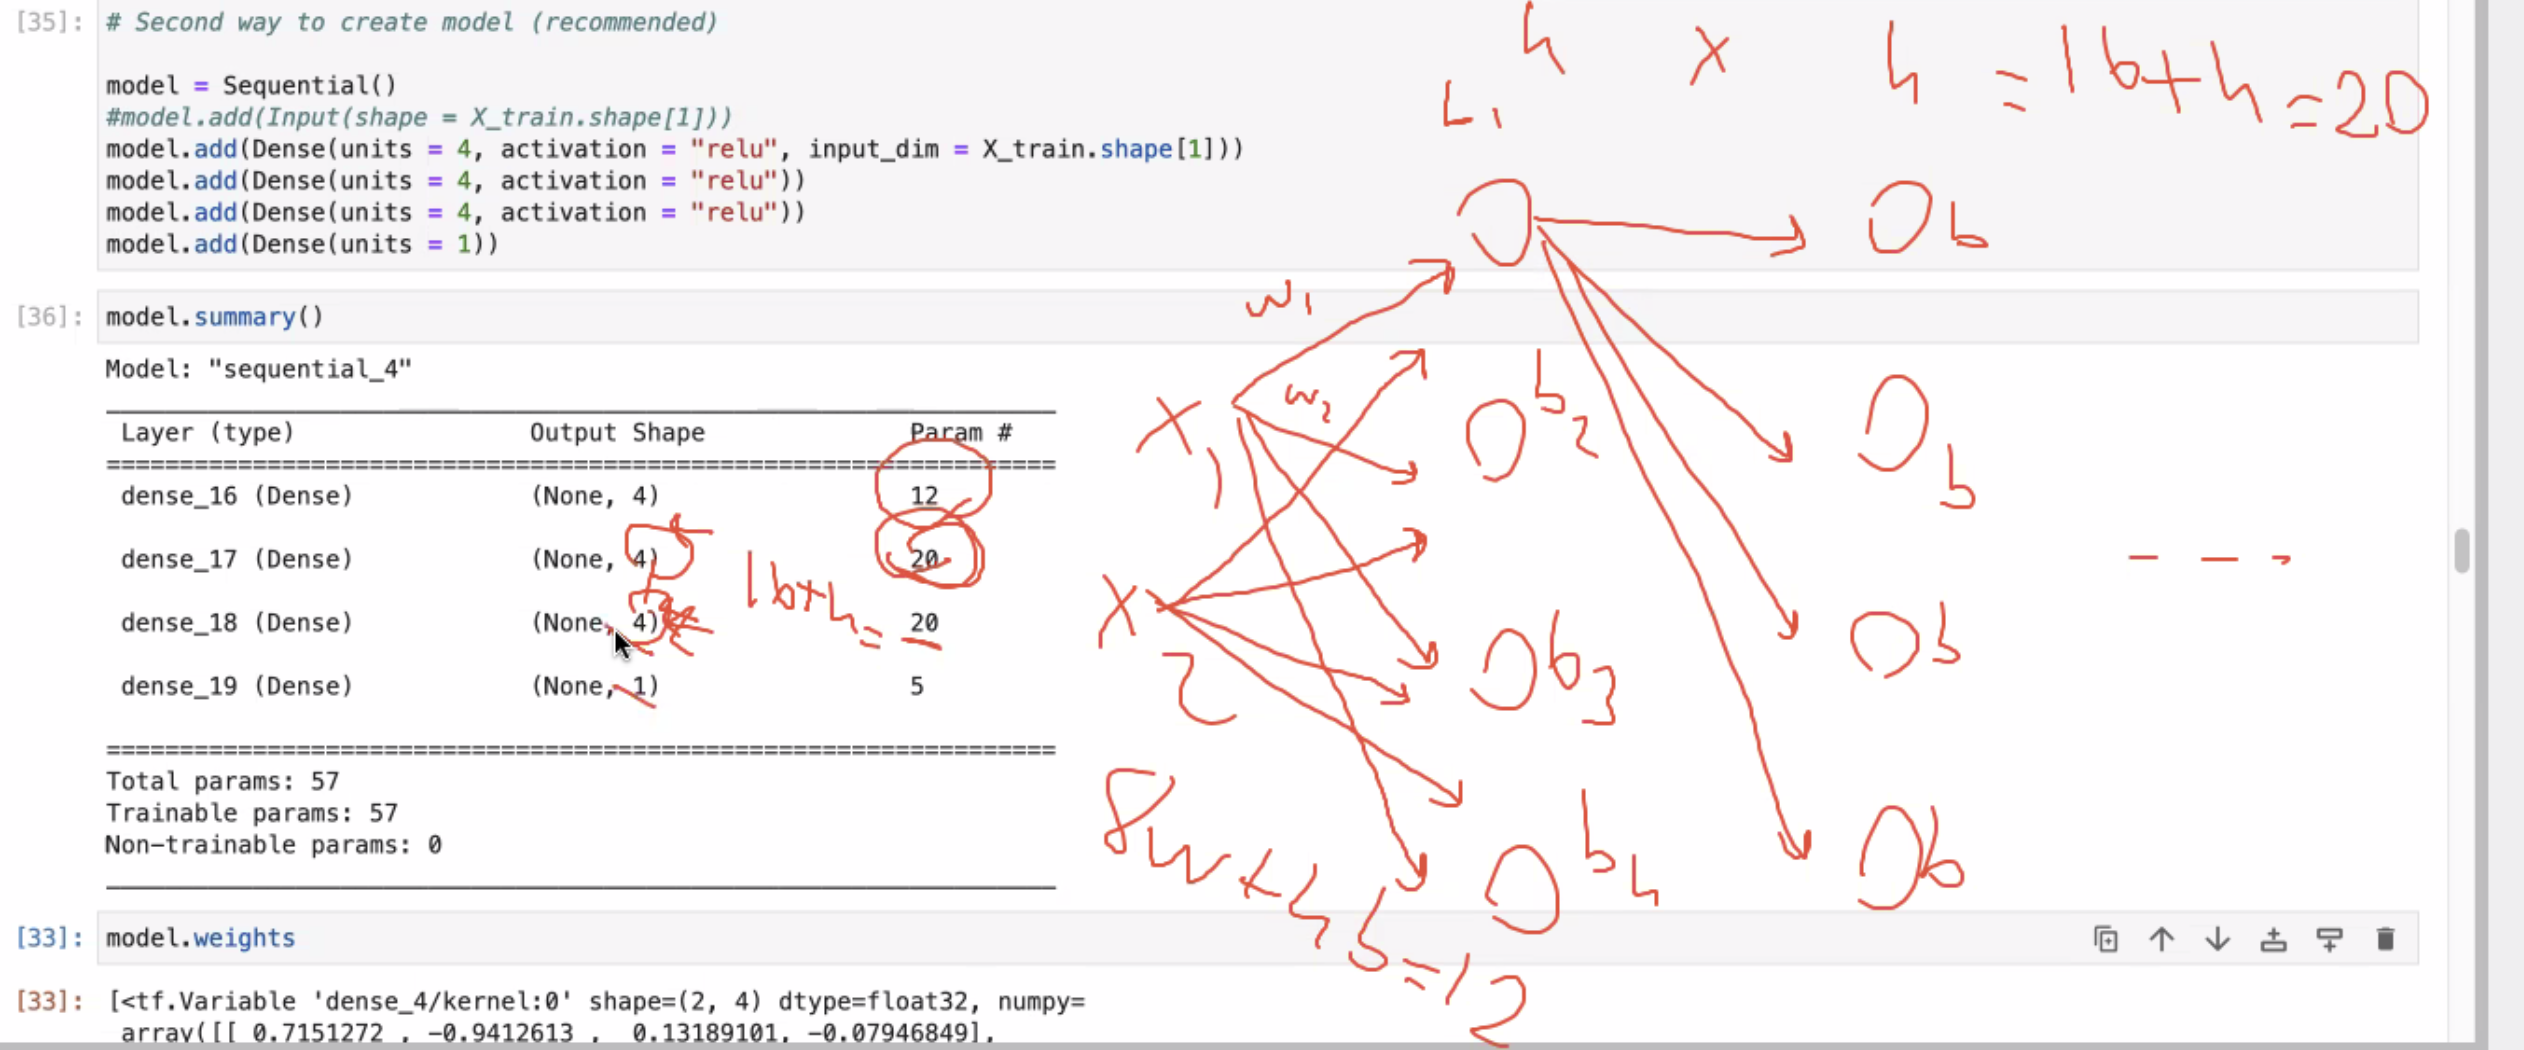

In [115]:
model.weights
# Model agirliklari rastgele atarken 0'a yakin olacak sekilde poz ve neg degerler atar 
# asagidaki degerler, layer layer tum networkteki agirliklari gosteriyor
# bias degerlerini basta 0 atar, sonrasinda bias da agirliklar gibi egitime girer.
# gorunen tum degerler backpropagationda guncellenecek. 
# default initialiser kullaniyoruz bir sey degistirmedik 

[<tf.Variable 'dense_24/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.69452786,  0.22961164, -0.41923213, -0.6247041 ],
        [-0.5881574 ,  0.76739454, -0.3081541 ,  0.5177717 ]],
       dtype=float32)>,
 <tf.Variable 'dense_24/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_25/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.37589794, -0.4838431 , -0.52992266,  0.8250565 ],
        [-0.28718245,  0.13197815,  0.6766358 , -0.81238234],
        [ 0.73110205,  0.41799873,  0.40552825,  0.2580145 ],
        [ 0.60035187, -0.06713212,  0.16991574, -0.28433263]],
       dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.36179316,  0.04152077, -0.83125186, -0.04524106],
        [ 0.82923955, -0.50437325,  0.6316698 , -0.33764368],
        [ 0.15134233,  0.47221023,  0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [116]:
model.compile(optimizer = "rmsprop", loss = "mse")

- optimiser: gradient descent
- optimizer="adam" secmek her zaman iyi sonuç vermeyebilir, 
- logistic regresyonda solver seçtiğimiz gibi burada da bir sürü optimizer var onları deneyerek en iyisini seçiyoruz
- loss= regression error yaptigimiz icin MSE (en cok kullanilan) 

In [117]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# batch_size : her seferinde 32 ornek isleme girecek
# epoch: tum dataset 250 sefer isleme sokulacak
# her epochta kac iterasyon var?: 700/32
# 21.. kusur sonuc cikar, her epochta model agirliklari 22 sefer guncellenecek demek.

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256493.8125
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256293.9375
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256107.5938
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255911.4219
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255694.8125
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255451.9062
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255181.5938
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254879.7656
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254540.8438
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254163.6875
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253748.0938
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 1334.6521
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 1307.8595
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1282.2130
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 1255.9381
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1228.8274
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1200.9866
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1177.8944
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1151.3684
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 1130.2582
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1111.0880
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1086.4984
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1063.56

22/22 [==============================] - 0s 1ms/step - loss: 27.1244
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 26.2806
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 26.3088
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 25.9424
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 26.0339
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 25.6611
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1773
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 25.2696
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 24.9112
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1274
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 24.7770
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 24.9731
Epoch 205/250
22/2

In [118]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 4)                 12        
                                                                 
 dense_25 (Dense)            (None, 4)                 20        
                                                                 
 dense_26 (Dense)            (None, 4)                 20        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.69452786,  2.3153868 , -0.41923213,  1.4692401 ],
        [-0.5881574 ,  3.9544814 , -0.3081541 ,  3.7099476 ]],
       dtype=float32)>,
 <tf.Variable 'dense_24/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.74076426, 0.        , 0.7475861 ], dtype=float32)>,
 <tf.Variable 'dense_25/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.37589794, -0.4838431 , -0.52992266,  0.8250565 ],
        [ 1.9300013 ,  0.0662578 ,  2.8858945 , -0.81238234],
        [ 0.73110205,  0.41799873,  0.40552825,  0.2580145 ],
        [ 2.7850354 , -0.123972  ,  2.355225  , -0.28433263]],
       dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.73281467, -0.06120849,  0.72196263,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.4276155 ,  2.1333494 , -0.9365455 ,  2.0505996 ],
        [ 0.79930997, -0.464830

- cikan sonuc egitilmis en guncel agirliklari gosterir
- egitimde bias degisiyor
- bias 0 olmasini, modelin ihtiyaci olmamis gibi yorumlayabiliriz 
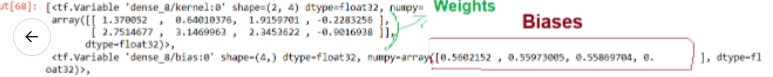
------


In [120]:
model.history.history

{'loss': [256493.8125,
  256293.9375,
  256107.59375,
  255911.421875,
  255694.8125,
  255451.90625,
  255181.59375,
  254879.765625,
  254540.84375,
  254163.6875,
  253748.09375,
  253287.75,
  252779.109375,
  252226.234375,
  251621.125,
  250958.46875,
  250239.8125,
  249455.984375,
  248609.171875,
  247692.734375,
  246711.703125,
  245651.265625,
  244519.0625,
  243298.703125,
  242001.171875,
  240612.34375,
  239141.828125,
  237566.015625,
  235893.21875,
  234120.234375,
  232248.578125,
  230272.40625,
  228174.21875,
  225967.171875,
  223649.890625,
  221210.359375,
  218651.078125,
  215962.5625,
  213148.890625,
  210208.453125,
  207133.9375,
  203953.921875,
  200622.859375,
  197146.65625,
  193547.984375,
  189822.015625,
  185932.640625,
  181921.4375,
  177801.3125,
  173523.03125,
  169118.75,
  164581.828125,
  159932.484375,
  155162.546875,
  150272.296875,
  145248.140625,
  140164.0625,
  134938.109375,
  129614.734375,
  124174.890625,
  118683.484375,


In [121]:
pd.DataFrame(model.history.history)

,loss
0,256493.812
1,256293.938
2,256107.594
3,255911.422
4,255694.812
...,...
245,24.028
246,24.205
247,24.212
248,24.167


<AxesSubplot:>

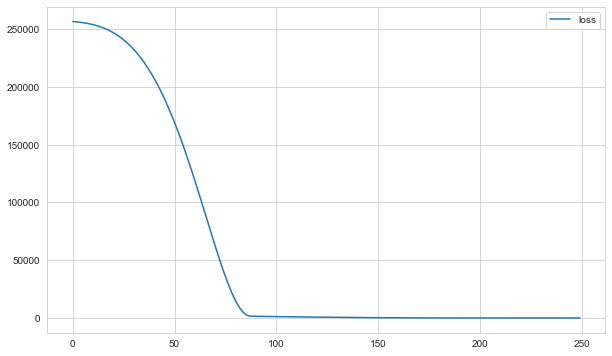

In [122]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

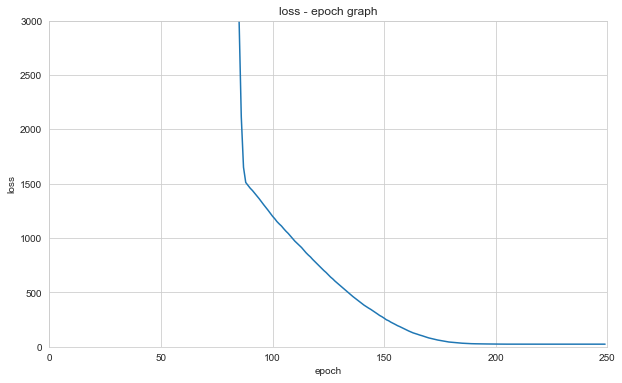

In [123]:
# zoomlayarak detay gormek istersek
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
model.evaluate(X_train, y_train, verbose=0)
# train icin loss functiona gore bir skor veriyor 
# son epochta aldigimiz degerle ayni olmak zorunda degil, 
# floating point(bitis noktasindaki hassasiyet) %100 accurate olmadigi icin aradaki ufak farklar olabilir
# mse kullanilinca, kullanilan en ufak degerin karesini aldigi icin aradaki fark buyuyor

23.792003631591797

In [127]:
model.evaluate(X_test, y_test, verbose=0)

25.00049591064453

In [130]:
# manuel yapabiliriz 
mean_squared_error(y_test,y_pred)
# cok yakin ama ayni degil

25.000501057721923

In [131]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [132]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)
# pred degerlerinin baya iyi oldugunu soyleyebiliriz
# kontrol icin MAPE (Mean absolute percentage error) bakabiliriz 

,Actual,Pred
213,361.426,357.367
78,408.122,410.148
350,257.712,258.079
947,412.907,414.083
800,492.873,493.576
670,499.212,500.655
250,375.959,381.788
721,571.706,572.757
430,462.882,457.482
82,462.005,465.980


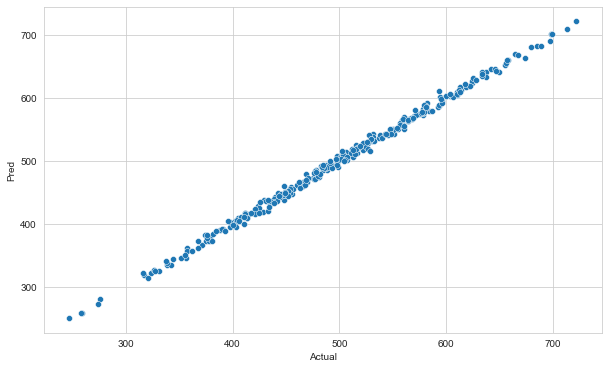

In [134]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [135]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:",rmse)

In [136]:
eval_metric(y_test, y_pred)

r2_score: 0.9971564591656247 
mae: 4.004044157343542 
mse: 25.000501057721923 
rmse: 5.000050105521136


## Final Model and Model Deployment

### Final Model Training

In [137]:
scaler = MinMaxScaler().fit(X)

In [138]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [139]:
X_scaled = scaler.transform(X)

In [140]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 257432.8906
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257164.2344
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 256836.0469
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 256467.5469
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256025.8438
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 255493.7344
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 254871.5156
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 254135.0781
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 253281.2500
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 252281.7500
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 251109.1719
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

32/32 [==============================] - 0s 1ms/step - loss: 441.1496
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 409.6305
Epoch 99/250
32/32 [==============================] - 0s 1ms/step - loss: 375.2270
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 341.9497
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 314.1382
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 284.2882
Epoch 103/250
32/32 [==============================] - 0s 1ms/step - loss: 255.6749
Epoch 104/250
32/32 [==============================] - 0s 1ms/step - loss: 232.9475
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 207.9005
Epoch 106/250
32/32 [==============================] - 0s 1ms/step - loss: 185.3366
Epoch 107/250
32/32 [==============================] - 0s 1ms/step - loss: 166.1055
Epoch 108/250
32/32 [==============================] - 0s 1ms/step - loss: 147.8560
Epoch 10

32/32 [==============================] - 0s 1ms/step - loss: 24.4164
Epoch 196/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7729
Epoch 197/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6433
Epoch 198/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7563
Epoch 199/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9383
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8564
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9031
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8082
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.8587
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6353
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5608
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7358
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [141]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'
# modelin structure, parametrelerini tek seferde dosya icerisine kaydediyor

In [55]:
#final_model.save("model_fake_reg") 

### Loading Model

In [142]:
from tensorflow.keras.models import load_model

In [143]:
model_fake_reg = load_model('model_fake_reg.h5')

In [144]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

ML de model parametrelerini almak ve modeli kaydetmek için *pickle* ve *joblib* kullanıyyorduk. 
- DL için ekstra bir kütüphaneye gerek yok

## Prediction-1

In [145]:
sample = [[998, 1000]]
# tek ornek olsa bile, ornegi dataframe olarak vermek gerekiyor 

In [146]:
sample_scaled = scaler_fake_reg.transform(sample)
# transform ediyoruz 

In [147]:
model_fake_reg.predict(sample_scaled)
# hali hazirda egitilmis modelden prediction aliyoruz 

1/1 [==============================] - 0s 52ms/step


array([[418.78363]], dtype=float32)

## Prediction-2

In [148]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [149]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [150]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [151]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 15ms/step


array([[378.71164],
       [330.4474 ],
       [282.18317],
       [233.91888],
       [185.65465]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___